<a href="https://colab.research.google.com/github/taaha3244/DLmodelsbyTaaha/blob/main/Iris_Dataset02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data=load_iris()
X=iris_data.data[:,0:2]
y=iris_data.target
feature_names = iris_data.feature_names
target_names = iris_data.target_names

Checking the Length,Shape And Data Type of Our Data

In [4]:
print(f'Length Of Features:{len(X)},Length of Labels:{len(y)},Shape Of Features:{X.shape},Shape of Labels: {y.shape}')

Length Of Features:150,Length of Labels:150,Shape Of Features:(150, 2),Shape of Labels: (150,)


In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X=torch.from_numpy(X)
y=torch.from_numpy(y)
len(X)

150

In [8]:
X=X.to(torch.float32)
y.type()

'torch.LongTensor'

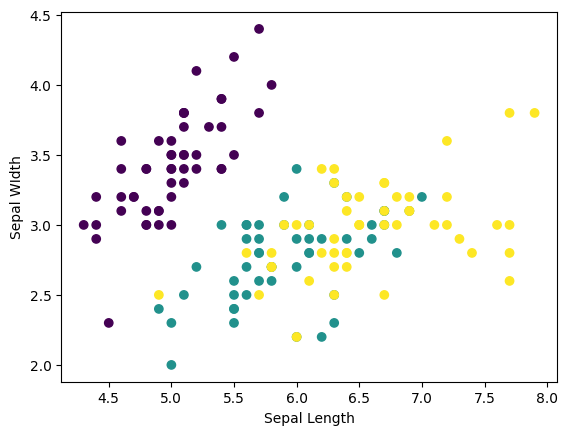

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal WIdth')
plt.show()


In [10]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target


In [11]:
df.iloc[0:10,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [12]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [13]:
from torch import nn
class IrisClassifier(nn.Module):
    def __init__(self):
        super().__init__()

        # Input layer
        self.input_layer = nn.Linear(2, 10)

        # Hidden layer
        self.hidden_layer = nn.Linear(10, 10)

        # Output layer
        self.output_layer = nn.Linear(10, 3)

        # Activation functions
        self.activation_fn1 = nn.ReLU()

    def forward(self, x):
        # Input layer
        x = self.input_layer(x)

        # Hidden layer
        x = self.activation_fn1(x)

        # Output layer
        x = self.output_layer(x)

        return x



In [14]:
model_0=IrisClassifier()

In [15]:
y_logits=model_0(X_train)
print(len(y_logits))
y_label=torch.softmax(y_logits,dim=1)
y_label[:10]


120


tensor([[0.6107, 0.0463, 0.3429],
        [0.6439, 0.0273, 0.3289],
        [0.5981, 0.0284, 0.3735],
        [0.6037, 0.0460, 0.3503],
        [0.5932, 0.0542, 0.3526],
        [0.5735, 0.0371, 0.3894],
        [0.6014, 0.0303, 0.3683],
        [0.6095, 0.0399, 0.3505],
        [0.6127, 0.0413, 0.3461],
        [0.6330, 0.0343, 0.3327]], grad_fn=<SliceBackward0>)

In [16]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [17]:
from tqdm.auto import tqdm
epochs=100
for epoch in tqdm(range(epochs)):
  model_0.train()
  y_pred=model_0(X_train)
  loss=loss_fn(y_pred,y_train)
  accuracy = (y_pred.argmax(dim=1) == y_train).sum().item()/len(X_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_preds=model_0(X_test)
    test_loss=loss_fn(test_preds,y_test)
    test_acc=(torch.softmax(test_preds,dim=1).argmax(dim=1)==y_test).sum().item()/len(y_test)
  if epoch%10==0:
    print(f' Train Loss: {loss:4f}, Train acc:  {accuracy:4f} Test Loss: {test_loss:4f}, Test acc :{test_acc:4f}')

  



  0%|          | 0/100 [00:00<?, ?it/s]

 Train Loss: 1.595547, Train acc:  0.333333 Test Loss: 1.135346, Test acc :0.366667
 Train Loss: 1.037278, Train acc:  0.675000 Test Loss: 1.025820, Test acc :0.700000
 Train Loss: 0.979276, Train acc:  0.683333 Test Loss: 0.973281, Test acc :0.700000
 Train Loss: 0.912119, Train acc:  0.691667 Test Loss: 0.907398, Test acc :0.700000
 Train Loss: 0.835867, Train acc:  0.708333 Test Loss: 0.833651, Test acc :0.733333
 Train Loss: 0.762065, Train acc:  0.691667 Test Loss: 0.763199, Test acc :0.733333
 Train Loss: 0.700484, Train acc:  0.691667 Test Loss: 0.706472, Test acc :0.733333
 Train Loss: 0.703251, Train acc:  0.675000 Test Loss: 0.796166, Test acc :0.500000
 Train Loss: 0.733915, Train acc:  0.600000 Test Loss: 0.850557, Test acc :0.466667
 Train Loss: 0.608001, Train acc:  0.708333 Test Loss: 0.626276, Test acc :0.733333


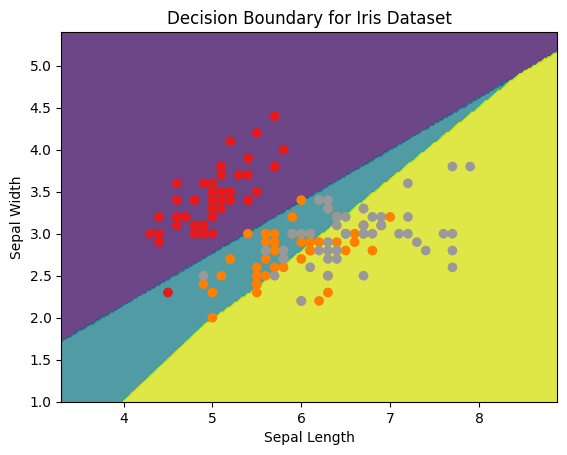

In [18]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
X_grid = np.c_[xx.ravel(), yy.ravel()]
X_grid_tensor = torch.Tensor(X_grid)
Z = model_0(X_grid_tensor)
Z = torch.argmax(Z, dim=1).numpy()
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Decision Boundary for Iris Dataset")
plt.show()